#Week 1: Goals and Learning Objective
In this brief tutorial we will do a hands on study of how to create a simple decision tree and random forest model using a small dataset.

Learning Objectives:

By the end of this notebook you will be
*  Able to load and perform initial descriptive analysis on the dataset
*  Create a simple decision tree model and evaluate its performance
*  Create a Random Forest model and compare its performance with the previous model

# Part 1: Get started



## The task

We want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

## The data
Download the data from kaggle:

To take a look at the competition data, click on the **<a href="https://www.kaggle.com/c/titanic/data" target="_blank" rel="noopener noreferrer"><b>Data tab</b></a>** at the top of the competition page.  Then, scroll down to find the list of files.  
There are three files in the data: (1) **train.csv**, (2) **test.csv**, and (3) **gender_submission.csv**.

### (1) train.csv

**train.csv** contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table).  To investigate this data, click on the name of the file on the left of the screen.  Once you've done this, you can view all of the data in the window.  

![](https://i.imgur.com/cYsdt0n.png)

The values in the second column (**"Survived"**) can be used to determine whether each passenger survived or not:
- if it's a "1", the passenger survived.
- if it's a "0", the passenger died.

For instance, the first passenger listed in **train.csv** is Mr. Owen Harris Braund.  He was 22 years old when he died on the Titanic.

### (2) test.csv

Using the patterns you find in **train.csv**, you have to predict whether the other 418 passengers on board (in **test.csv**) survived.  

Click on **test.csv** (on the left of the screen) to examine its contents.  Note that **test.csv** does not have a **"Survived"** column - this information is hidden from you, and how well you do at predicting these hidden values will determine how highly you score in the competition!

### (3) gender_submission.csv

The **gender_submission.csv** file is provided as an example that shows how you should structure your predictions.  It predicts that all female passengers survived, and all male passengers died.  Your hypotheses regarding survival will probably be different, which will lead to a different submission file.  But, just like this file, your submission should have:
- a **"PassengerId"** column containing the IDs of each passenger from **test.csv**.
- a **"Survived"** column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Any results you write to the current directory are saved as output.


## Part 2 Load the data





In [3]:
#@title Hint on how to load data
train_data = pd.read_csv("train.csv")
train_data.head()

#load the test data too
test_data = pd.read_csv("test.csv")




# Part 3:

Remember our goal: we want to find patterns in **train.csv** that help us predict whether the passengers in **test.csv** survived.

It might initially feel overwhelming to look for patterns, when there's so much data to sort through.  So, we'll start simple.

## Explore a pattern

Remember that the sample submission file in **gender_submission.csv** assumes that all female passengers survived (and all male passengers died).  

Is this a reasonable first guess?  We'll check if this pattern holds true in the data (in **train.csv**).



In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


Before moving on, calculate the percentage of male passengers (in **train.csv**) who survived.



In [5]:
#@title Hint
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


## Discuss in your group
How about age? What percentage of kids survived?

In [6]:
kids = train_data.loc[train_data.Age < 15]["Survived"]
rate_kids = sum(kids)/len(kids)

print("% of kids who surivived:", rate_kids)

% of kids who surivived: 0.5769230769230769


# Part 4: Decision Tree
Build your first decision tree here using this dataset, what features will you use.



In [7]:
#@title Show the solution
from sklearn import tree
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])

X_test = pd.get_dummies(test_data[features])

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X, y)

# Predicting results for test dataset
y_pred = decision_tree.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Your file was successfully saved!")

Your file was successfully saved!


In [8]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Discuss in groups

1.  Is this a good tree?
2.  How do you evaluate its goodness?
3.  What if we modified the features?
4.  What about the depth? what happens if we modify it to 1?


In [9]:
#@title Show solution
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

80.02

In [24]:
from sklearn.impute import SimpleImputer
from pandas import DataFrame

print(train_data.describe())
imp = SimpleImputer(missing_values=np.nan, strategy="mean")

imp.fit_transform(X)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


array([[3., 1., 0., 0., 1.],
       [1., 1., 0., 1., 0.],
       [3., 0., 0., 1., 0.],
       ...,
       [3., 1., 2., 1., 0.],
       [1., 0., 0., 0., 1.],
       [3., 0., 0., 0., 1.]], shape=(891, 5))

In [12]:
#@title Run this cell to visualise the tree
import graphviz

dot_data = tree.export_graphviz(decision_tree,    # Our tree
                                out_file=None,    # Output a string
                                filled=True,      # Color-code by ratio Survived (value)
                                rounded=True,     # Make the boxes rounded
                                proportion=True,  # Show samples %
                                node_ids=False,   # Give each node an ID number
                                rotate=True,      # Rotate the graph to be Left->Right instead of Top->Down
                                special_characters=False, # Ignore special characters
                                precision=3,      # Limit decimal places
                                feature_names=X.columns, # Use our column names
                                class_names = (   # Label each node as Survived/Not Survived
                                    ["Survived" if int(i) == 1 else "Not Survived"
                                     for i in y.unique()]),
                                )

graphviz.Source(dot_data, format="png")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Random Forest and Bagging Classifiers

Bagging and pasting involves training several predictors on different random samples of the training set.
When sampling is performed with replacement, this method is called *bagging*  (short for boot‐ strap aggregating). When sampling is performed without replacement, it is called *pasting*.


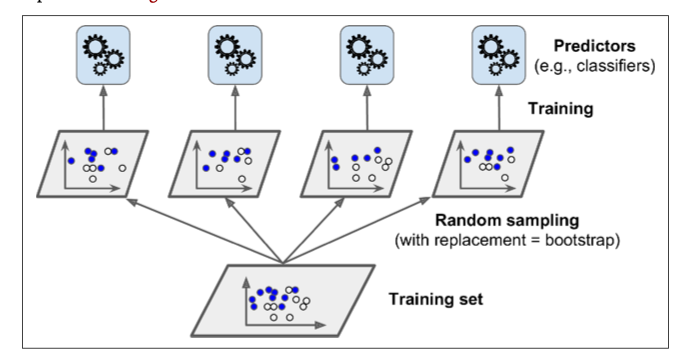

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1, max_samples=100, bootstrap=True, n_jobs=-1)
#for pasting you will do bootstap=false
bag_clf.fit(X,y)
y = bag_clf.predict(X)



In [14]:
round(bag_clf.score(X, y) * 100, 2)

100.0

##Out-of-Bag Evaluation

With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all. By default a BaggingClassifier samples m training instances with replacement (bootstrap=True), where m is the size of the training set. This means that only about 63% of the training instances are sampled on average for each predictor.6 The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Note that they are not the same 37% for all predictors.
Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set. You can evaluate the ensemble itself by averaging out the oob evaluations of each predictor.

In Scikit-Learn, you can set oob_score=True when creating a BaggingClassifier to request an automatic oob evaluation after training.

In [15]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X,y)
bag_clf.oob_score_

c:\Users\Khang\how-do-i-python\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:864: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\Khang\how-do-i-python\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:870: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.936026936026936

According to this oob evaluation, this BaggingClassifier is likely to achieve about 96% on the test dataset. Alas we don't have the test labels to measure in this case. But if we had we could do:


from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)


## Random Forest

As we have discussed, a Random Forest9 is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting), typically with max_samples set to the size of the training set. Instead of building a BaggingClassifier and pass‐ ing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier class, which is more convenient and optimized for Decision Trees10 (similarly, there is a RandomForestRegressor class for regression tasks).



## Part 5 Random Forest
We'll build what's known as  **a random forest model**.  This model is constructed of several "trees" (there are three trees in the picture below, but we'll construct 100!) that will individually consider each passenger's data and vote on whether the individual survived.  Then, the random forest model makes a democratic decision: the outcome with the most votes wins!
First we need to consider which features to use. How can we decide on this?

![](https://i.imgur.com/AC9Bq63.png)





In [ ]:
#@title Your solution here


In [16]:
#@title Solution
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


We will come back to decision trees to look more into regularizations and more depth in week 3 (see canvas module).  
References and additional resources:

For plotting complex decision trees see here:
 https://mljar.com/blog/visualize-decision-tree/



##What about other Ensemble Methods

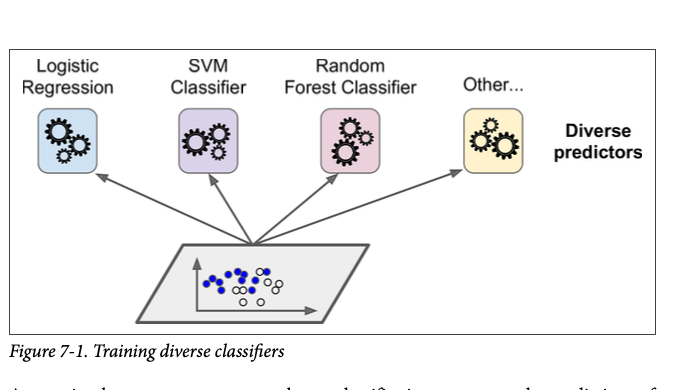

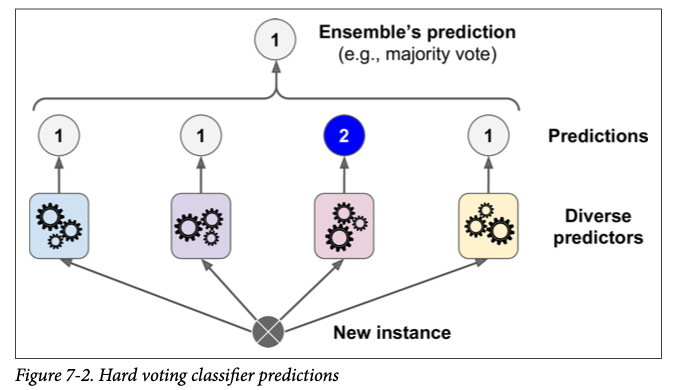

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
        estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting='hard')
voting_clf.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [18]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X, y)
  y_pred = clf.predict(X) #X_test but because we dont have the test labels
  print(clf.__class__.__name__, accuracy_score(y, y_pred)) #y_test but because we dont have the test labels

LogisticRegression 0.8002244668911336
RandomForestClassifier 0.8170594837261503
SVC 0.8058361391694725
VotingClassifier 0.8092031425364759
